# Machine Learning Model Building

In [27]:
# Load libraries
import pandas
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
url = "dataset_cybersecurity_michelle.csv"
data = read_csv(url)
data.columns[97:111]

Index(['time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened'],
      dtype='object')

### Graphs

In [22]:
# Histogram
names = ['time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened']
df = pandas.read_csv(url,names=names)
df.describe

c:\Users\21AhmedU\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method NDFrame.describe of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [23]:
df.hist()
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [12]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

TypeError: no numeric data to plot

In [13]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

TypeError: no numeric data to plot

Empty DataFrame
Columns: []
Index: []


<ipython-input-25-404676465b68>:6: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  cax = ax.matshow(correlations, vmin=-1, vmax=1)
<ipython-input-25-404676465b68>:6: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  cax = ax.matshow(correlations, vmin=-1, vmax=1)


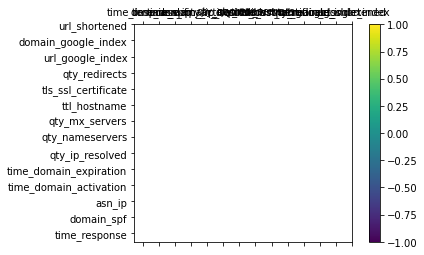

In [25]:
# plot correlation matrix
correlations = data[names].corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
# Scatterplot Matrix
scatter_matrix(data)
plt.show()

In [ ]:
# Box Plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Making a model and testing accuracy (classification)

In [3]:
# Split-out validation dataset
array = data.values
X = array[:,97:111]
y = array[:,111]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


In [4]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6839244410177332
[[11471  4102]
 [ 4097  6270]]
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74     15573
         1.0       0.60      0.60      0.60     10367

    accuracy                           0.68     25940
   macro avg       0.67      0.67      0.67     25940
weighted avg       0.68      0.68      0.68     25940



In [28]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
        ('model', model)
    ])
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(pipeline, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.672382 (0.004717)
LDA: 0.687957 (0.003809)
KNN: 0.881783 (0.003662)
CART: 0.924112 (0.001714)
NB: 0.695069 (0.003649)


### Feature selection

In [8]:
k_best = 10  
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_validation)

# build model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, Y_train)

y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(Y_validation, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9529298380878951
